In [ ]:
! pip install nilearn

In [65]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# **Dataset A**

In [3]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=200) # this needs to be modified for  some tasks
print('%i regions found in this atlas' % (len(np.unique(nib.load(yeo.maps).get_fdata().ravel()))  - 1))
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True,   memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females  and 0 for males

200 regions found in this atlas


### **Question 1**

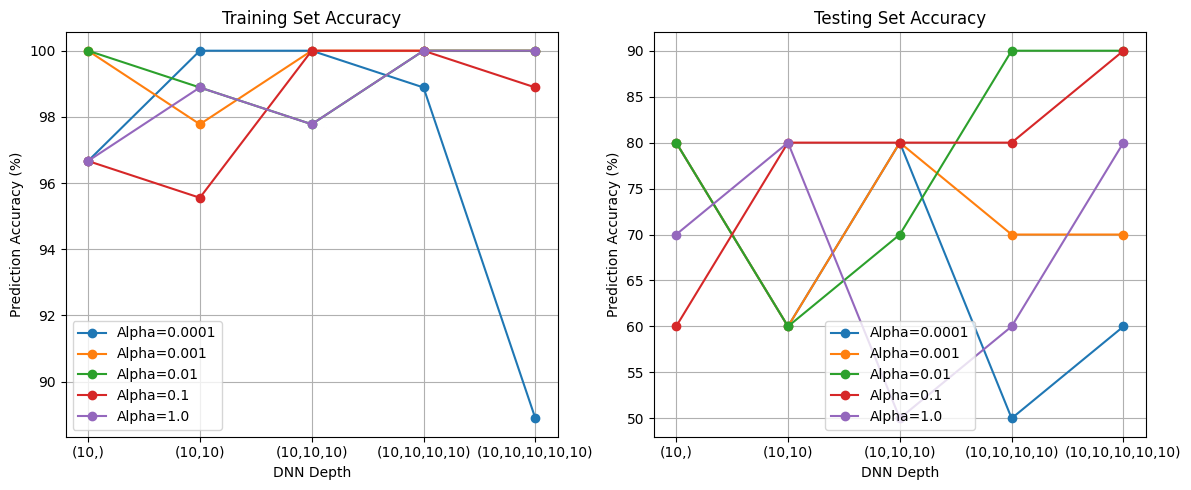

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # Set n_rois to 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females  and 0 for males

# Split the data: First 90 for training, last 10 for testing
X_train, X_test = input_variables[:90], input_variables[90:] # Get first 90 subjects
y_train, y_test = output_variable[:90], output_variable[90:] # Get last 10 subjects

architectures = [(10,), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)] # DNN architectures
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0] # Alpha values for regularization

train_accuracies = {alpha: [] for alpha in alpha_values} # Training set accuracies
test_accuracies = {alpha: [] for alpha in alpha_values} # Testing set accuracies

for alpha in alpha_values: # Iterate through alpha values
    for architecture in architectures: # Iterate through each architecture
        # Create model
        model_q1 = MLPClassifier(hidden_layer_sizes=architecture, activation='relu', alpha=alpha)
        model_q1.fit(X_train, y_train) # Fit the model
        
        train_acc = accuracy_score(y_train, model_q1.predict(X_train))*100 # Calculate training accuracy
        test_acc = accuracy_score(y_test, model_q1.predict(X_test))*100 # Calculate testing accuracy
        
        train_accuracies[alpha].append(train_acc) # Add training accuracy to dictionary
        test_accuracies[alpha].append(test_acc) # Add testing accuracy to dictionary

titles=['Training Set Accuracy','Testing Set Accuracy'] # Plot titles
accuracy_type=[train_accuracies,test_accuracies] # List with accuracies for each plot

plt.figure(figsize=(12, 5)) # Set plot size
for i in range(2): # Iterate through training and testing accuracies
    plt.subplot(1, 2, i+1) # Create subplots
    for alpha in alpha_values:
        plt.plot(range(5), accuracy_type[i][alpha], label=f'Alpha={alpha}', marker='o') # Plot accuracies for each alpha
    plt.xlabel('DNN Depth') # Set x-axis label
    plt.ylabel('Prediction Accuracy (%)') # Set y-axis label
    plt.title(titles[i]) # Set plot title
    plt.xticks(range(5), ['(10,)', '(10,10)', '(10,10,10)', '(10,10,10,10)', '(10,10,10,10,10)']) # Set x-axis ticks
    plt.legend() # Show legend
    plt.grid() # Show grid
    plt.tight_layout() # Adjust layout
plt.show() # Show plot

### **Question 2**

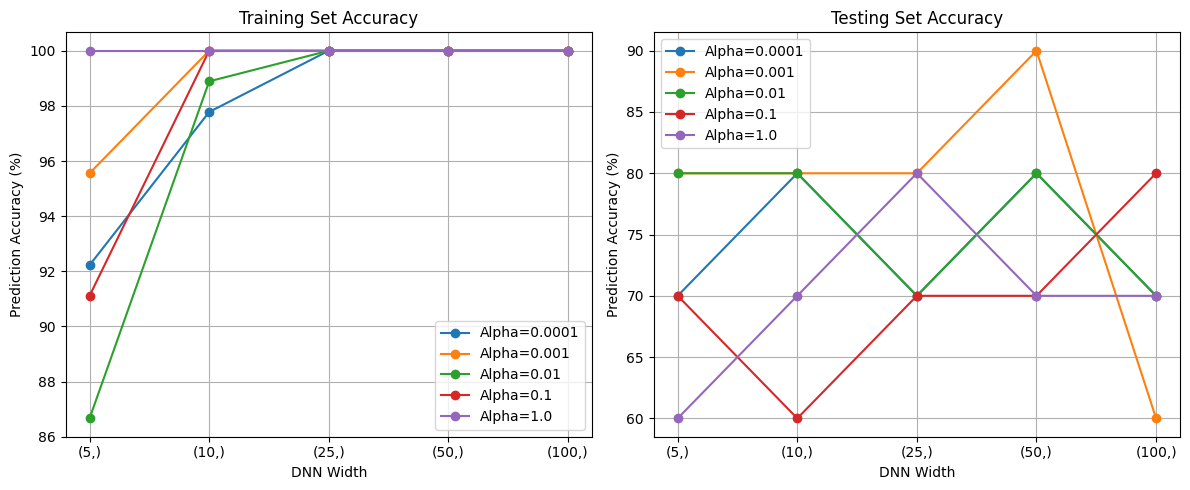

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # Set n_rois to 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females  and 0 for males

# Split the data: First 90 for training, last 10 for testing
X_train, X_test = input_variables[:90], input_variables[90:] # Get first 90 subjects
y_train, y_test = output_variable[:90], output_variable[90:] # Get last 10 subjects

widths = [(5,), (10,), (25,), (50,), (100,)] # DNN widths
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0] # Alpha values for regularization

train_accuracies = {alpha: [] for alpha in alpha_values} # Training set accuracies
test_accuracies = {alpha: [] for alpha in alpha_values} # Testing set accuracies

for alpha in alpha_values: # Iterate through alpha values
    for width in widths: # Iterate through each width
        # Create model with the given width & alpha
        model_q2 = MLPClassifier(hidden_layer_sizes=width, activation='relu', alpha=alpha)#, random_state=42)
        model_q2.fit(X_train, y_train) # Fit the model
        
        train_acc = accuracy_score(y_train, model_q2.predict(X_train))*100 # Calculate training accuracy
        test_acc = accuracy_score(y_test, model_q2.predict(X_test))*100 # Calculate testing accuracy
        
        train_accuracies[alpha].append(train_acc) # Store train accuracy
        test_accuracies[alpha].append(test_acc) # Store test accuracy

titles=['Training Set Accuracy','Testing Set Accuracy'] # Plot titles
accuracy_type=[train_accuracies,test_accuracies] # List with accuracies for each plot

plt.figure(figsize=(12, 5)) # Plot the results
for i in range(2): # Iterate through training and testing accuracies
    plt.subplot(1, 2, i+1) # Create subplot
    for alpha in alpha_values: # Iterate through alpha values
        plt.plot(range(5), accuracy_type[i][alpha], label=f'Alpha={alpha}', marker='o') # Plot accuracies for each alpha
    plt.xlabel('DNN Width') # Set x-axis label
    plt.ylabel('Prediction Accuracy (%)') # Set y-axis label
    plt.title(titles[i]) # Set plot title
    plt.xticks(range(5), ['(5,)', '(10,)', '(25,)', '(50,)', '(100,)']) # Set x-axis ticks
    plt.legend() # Show legend
    plt.grid() # Show grid
    plt.tight_layout() # Adjust layout
plt.show() # Show plots

### **Question 3**

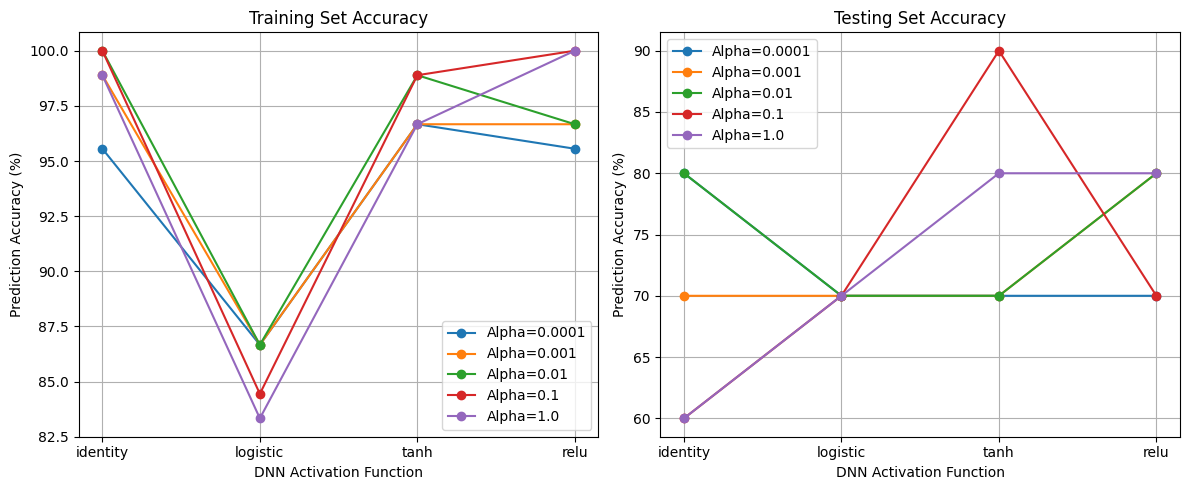

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # Set n_rois to 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females  and 0 for males

# Split the data: First 90 for training, last 10 for testing
X_train, X_test = input_variables[:90], input_variables[90:] # Get first 90 subjects
y_train, y_test = output_variable[:90], output_variable[90:] # Get last 10 subjects

activations = ['identity', 'logistic', 'tanh', 'relu'] # Activation functions
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0] # Alpha values for regularization

train_accuracies = {alpha: [] for alpha in alpha_values} # Training set accuracies
test_accuracies = {alpha: [] for alpha in alpha_values} # Testing set accuracies

for alpha in alpha_values: # Iterate through alpha values
    for activation in activations: # Iterate through each activation function
        # Create the model with the given activation function and alpha
        model_q3 = MLPClassifier(hidden_layer_sizes=(10,), activation=activation, alpha=alpha)#, random_state=42)
        model_q3.fit(X_train, y_train) # Fit the model
        
        train_acc = accuracy_score(y_train, model_q3.predict(X_train))*100 # Calculate training accuracy
        test_acc = accuracy_score(y_test, model_q3.predict(X_test))*100 # Calculate testing accuracy
        
        train_accuracies[alpha].append(train_acc) # Store train accuracy
        test_accuracies[alpha].append(test_acc) # Store test accuracy

titles=['Training Set Accuracy','Testing Set Accuracy'] # Plot titles
accuracy_type=[train_accuracies,test_accuracies] # List with accuracies for each plot

plt.figure(figsize=(12, 5)) # Plot the results
for i in range(2): # Iterate through training and testing accuracies
    plt.subplot(1, 2, i+1) # Create subplot
    for alpha in alpha_values: # Iterate through alpha values
        plt.plot(range(4), accuracy_type[i][alpha], label=f'Alpha={alpha}', marker='o') # Plot accuracies for each alpha
    plt.xlabel('DNN Activation Function') # Set x-axis label
    plt.ylabel('Prediction Accuracy (%)') # Set y-axis label
    plt.title(titles[i]) # Set plot title
    plt.xticks(range(4), activations) # Set x-axis ticks
    plt.legend() # Show legend
    plt.grid() # Show grid
    plt.tight_layout() # Adjust layout
plt.show()

### **Question 4** 

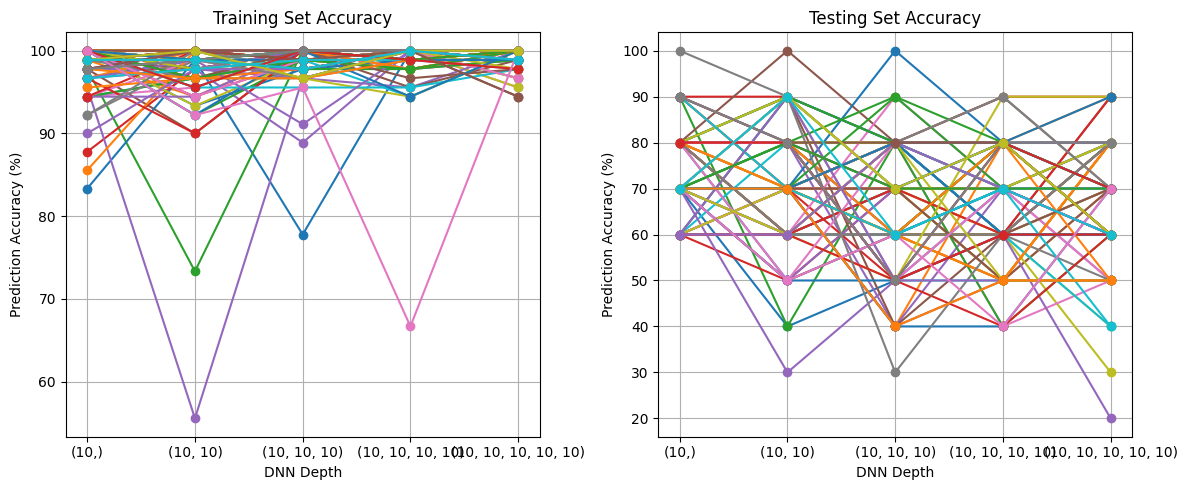

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = (brain_data.ext_vars.mf == 'F').astype(int)

# Split the data: First 90 for training, last 10 for testing
X_train, X_test = input_variables[:90], input_variables[90:] # Get first 90 subjects
y_train, y_test = output_variable[:90], output_variable[90:] # Get last 10 subjects

depths = [(10,), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)] # DNN depths
alpha_value = 0.0001 # Fixed alpha value
random_states = range(100)

train_accuracies = {depth: [] for depth in depths} # Training set accuracies
test_accuracies = {depth: [] for depth in depths} # Testing set accuracies

for depth in depths: # Iterate through depths
    for random_state in random_states: # Iterate through random states
        # Create the model with the given depth and fixed alpha
        model_q4 = MLPClassifier(hidden_layer_sizes=depth, activation='relu', alpha=alpha_value, random_state=random_state)
        model_q4.fit(X_train, y_train) # Fit the model

        train_accuracies[depth].append(accuracy_score(y_train, model_q4.predict(X_train))*100) # Store train accuracy
        test_accuracies[depth].append(accuracy_score(y_test, model_q4.predict(X_test))*100) # Store test accuracy

# Convert accuracies to arrays
train_array = np.array([train_accuracies[depth] for depth in depths]).T
test_array = np.array([test_accuracies[depth] for depth in depths]).T

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
depth_labels = ['(10,)', '(10, 10)', '(10, 10, 10)', '(10, 10, 10, 10)', '(10, 10, 10, 10, 10)']

for i, data in enumerate([train_array, test_array]): # Iterate through training and testing accuracies
    for j in range(100): # Iterate through random states
        axs[i].plot(range(5), data[j], marker='o') # Plot accuracies for each random state
    axs[i].set_title('Training Set Accuracy' if i == 0 else 'Testing Set Accuracy')
    axs[i].set_xlabel('DNN Depth')
    axs[i].set_ylabel('Prediction Accuracy (%)')
    axs[i].set_xticks(range(5))
    axs[i].set_xticklabels(depth_labels)
    axs[i].grid()
plt.tight_layout()
plt.show()

### **Question 5**

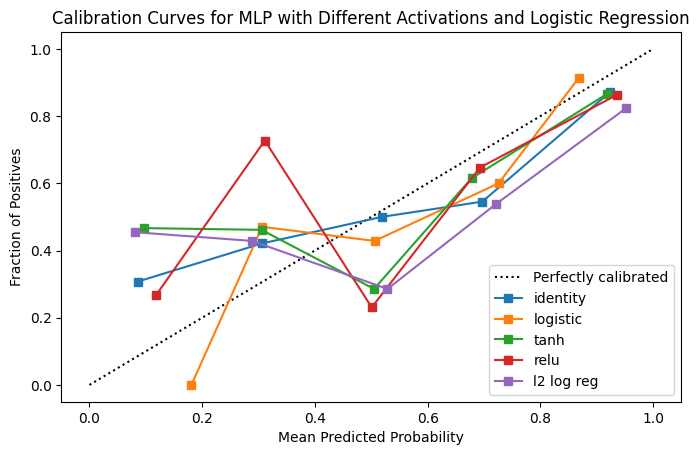

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = (brain_data.ext_vars.mf == 'F').astype(int)

activations = ['identity', 'logistic', 'tanh', 'relu', 'l2 log reg'] # Activation functions
alpha_value = 0.0001 # Fixed alpha value

# Lists to store probabilities & true labels
calibration_results = {activation: {'y_prob': [], 'y_true': []} for activation in activations}
#kf_q5 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-fold cross-validation
kf_q5 = KFold(n_splits=10, shuffle=True, random_state=42) # 10-fold cross-validation

for activation in activations: # Iterate through activations
    for train_index, test_index in kf_q5.split(input_variables, output_variable): # Iterate through folds
        if activation == 'l2 log reg': # If the current activation is log regression
            log_model_q5 = LogisticRegression(penalty="l2") # Create log model (L2 penalty)
            log_model_q5.fit(input_variables[train_index], output_variable[train_index]) # Fit model
            y_prob = log_model_q5.predict_proba(input_variables[test_index])[:,1] # Get probabilities
        else:
            # Create MLPClassifier
            model_q5 = MLPClassifier(hidden_layer_sizes=(10,), activation=activation, alpha=alpha_value, random_state=42)
            model_q5.fit(input_variables[train_index], output_variable[train_index]) # Fit model
            y_prob = model_q5.predict_proba(input_variables[test_index])[:,1] # Get probabilities
        
        calibration_results[activation]['y_prob'].extend(y_prob) # Store probabilities
        calibration_results[activation]['y_true'].extend(output_variable[test_index]) # Store true labels

fig, cal_ax = plt.subplots() # Plot Calibration Curves
fig.set_figwidth(8) # Set figure width
for activation in activations: # Iterate through activations
    cal_curve = CalibrationDisplay.from_predictions(y_true=calibration_results[activation]['y_true'], 
                                                    y_prob=calibration_results[activation]['y_prob'], 
                                                    name = activation, ax=cal_ax)
plt.xlabel('Mean Predicted Probability') # Set x-axis label
plt.ylabel('Fraction of Positives') # Set y-axis label
plt.title('Calibration Curves for MLP with Different Activations & Logistic Regression') # Set plot title
plt.legend() # Show legend
plt.show()

# **Dataset B**

In [32]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
crad = datasets.fetch_atlas_craddock_2012() 
atlas_nii = index_img(crad['scorr_mean'], 42) # this needs to be modified for some tasks 
print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_fdata().ravel())) - 1)) 
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True) 
input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] #  gives subject age on standard units after z-scoring 

788 regions found in this atlas


### **Question 6**

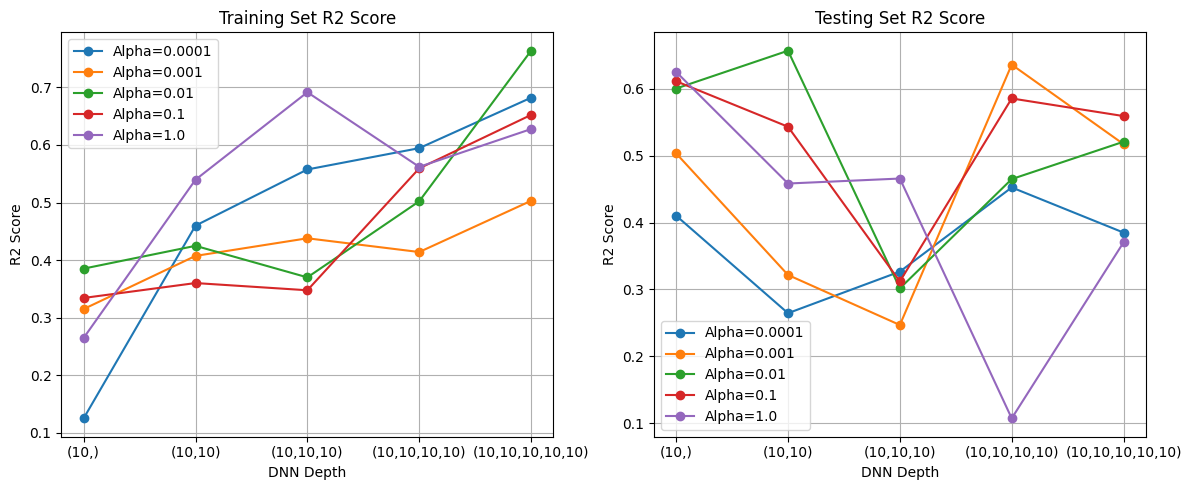

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
crad = datasets.fetch_atlas_craddock_2012() 
atlas_nii = index_img(crad['scorr_mean'], 0) # Lowest resolution
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True) 
input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] #  gives subject age on standard units after z-scoring 

# Split the data: First 90 for training, last 10 for testing
X_train, X_test = input_variables[:90], input_variables[90:] # Get first 90 subjects
y_train, y_test = output_variable[:90], output_variable[90:] # Get last 10 subjects

depths = [(10,), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)] # DNN architectures
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0] # Alpha values for regularization

train_r2_scores = {alpha: [] for alpha in alpha_values} # Training set R2 scores
test_r2_scores = {alpha: [] for alpha in alpha_values} # Testing set R2 scores

for alpha in alpha_values: # Iterate through alpha values
    for depth in depths: # Iterate through each architecture
        # Create model
        model_q6 = MLPRegressor(hidden_layer_sizes=depth, activation='relu', alpha=alpha)
        model_q6.fit(X_train, y_train) # Fit the model
        
        train_r2 = r2_score(y_train, model_q6.predict(X_train)) # Calculate training R2
        test_r2 = r2_score(y_test, model_q6.predict(X_test)) # Calculate testing R2
        
        train_r2_scores[alpha].append(train_r2) # Add training R2
        test_r2_scores[alpha].append(test_r2) # Add testing R2

titles=['Training Set R2 Score','Testing Set R2 Score'] # Plot titles
r2_type=[train_r2_scores,test_r2_scores] # List with accuracies for each plot

plt.figure(figsize=(12, 5)) # Set plot size
for i in range(2): # Iterate through training and testing R2 scores
    plt.subplot(1, 2, i+1) # Create subplots
    for alpha in alpha_values: # Iterate through alpha values
        plt.plot(range(5), r2_type[i][alpha], label=f'Alpha={alpha}', marker='o') # Plot accuracies for each alpha
    plt.xlabel('DNN Depth') # Set x-axis label
    plt.ylabel('R2 Score') # Set y-axis label
    plt.title(titles[i]) # Set plot title
    plt.xticks(range(5), ['(10,)', '(10,10)', '(10,10,10)', '(10,10,10,10)', '(10,10,10,10,10)']) # Set x-axis ticks
    plt.legend() # Show legend
    plt.grid() # Show grid
    plt.tight_layout() # Adjust layout
plt.show() # Show plot

### **Question 7**

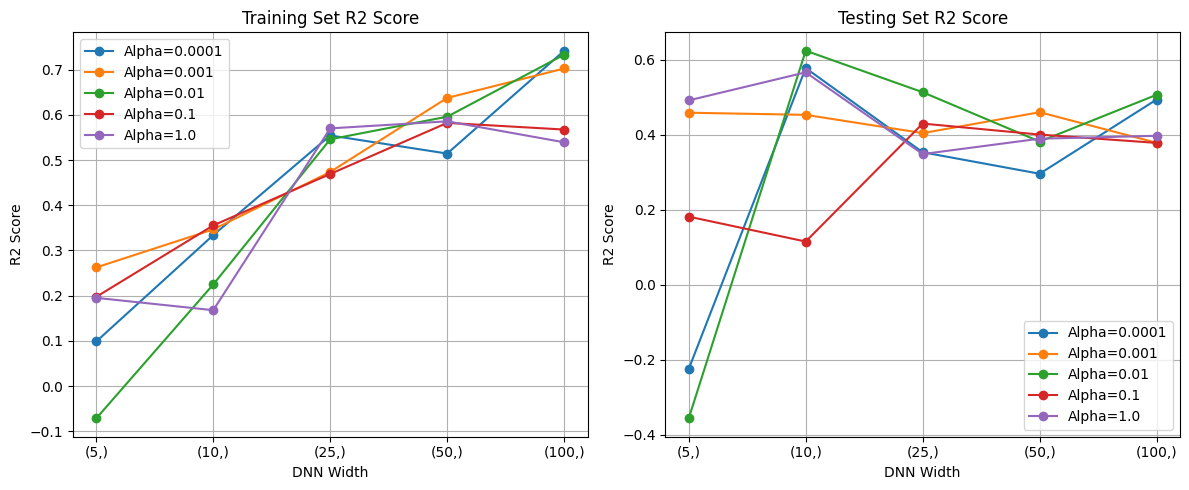

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
crad = datasets.fetch_atlas_craddock_2012() 
atlas_nii = index_img(crad['scorr_mean'], 0) # Lowest resolution
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True) 
input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] #  gives subject age on standard units after z-scoring 

# Split the data: First 90 for training, last 10 for testing
X_train, X_test = input_variables[:90], input_variables[90:] # Get first 90 subjects
y_train, y_test = output_variable[:90], output_variable[90:] # Get last 10 subjects

widths = [(5,), (10,), (25,), (50,), (100,)] # DNN widths
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0] # Alpha values for regularization

train_r2_scores = {alpha: [] for alpha in alpha_values} # Training set R2 scores
test_r2_scores = {alpha: [] for alpha in alpha_values} # Testing set R2 scores

for alpha in alpha_values: # Iterate through alpha values
    for width in widths:
        # Create model with the given width & alpha
        model_q7 = MLPRegressor(hidden_layer_sizes=width, activation='relu', alpha=alpha)#, random_state=42)
        model_q7.fit(X_train, y_train) # Fit the model
        
        train_r2 = r2_score(y_train, model_q7.predict(X_train)) # Calculate training R2
        test_r2 = r2_score(y_test, model_q7.predict(X_test)) # Calculate testing R2
        
        train_r2_scores[alpha].append(train_r2) # Store train R2
        test_r2_scores[alpha].append(test_r2) # Store test R2

titles=['Training Set R2 Score','Testing Set R2 Score'] # Plot titles
r2_type=[train_r2_scores,test_r2_scores] # List with R2 scores for each plot

plt.figure(figsize=(12, 5)) # Plot the results
for i in range(2): # Iterate through training and testing accuracies
    plt.subplot(1, 2, i+1) # Create subplot
    for alpha in alpha_values: # Iterate through alpha values
        plt.plot(range(5), r2_type[i][alpha], label=f'Alpha={alpha}', marker='o') # Plot R2 for each alpha
    plt.xlabel('DNN Width') # Set x-axis label
    plt.ylabel('R2 Score') # Set y-axis label
    plt.title(titles[i]) # Set plot title
    plt.xticks(range(5), ['(5,)', '(10,)', '(25,)', '(50,)', '(100,)']) # Set x-axis ticks
    plt.legend() # Show legend
    plt.grid() # Show grid
    plt.tight_layout() # Adjust layout
plt.show() # Show plots

### **Question 8**

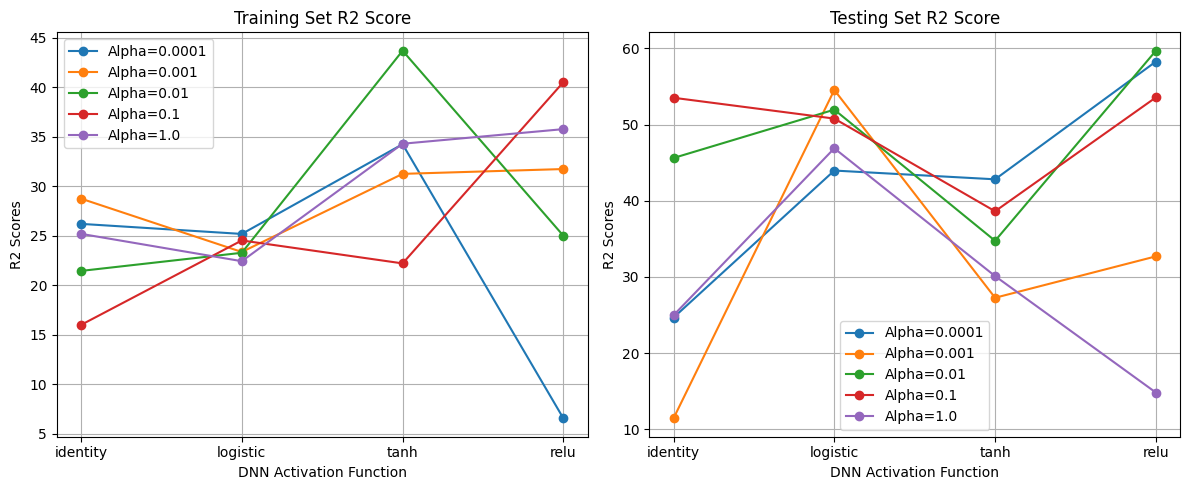

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
crad = datasets.fetch_atlas_craddock_2012() 
atlas_nii = index_img(crad['scorr_mean'], 0) # Lowest resolution
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True) 
input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] #  gives subject age on standard units after z-scoring 

# Split the data: First 90 for training, last 10 for testing
X_train, X_test = input_variables[:90], input_variables[90:] # Get first 90 subjects
y_train, y_test = output_variable[:90], output_variable[90:] # Get last 10 subjects

activations = ['identity', 'logistic', 'tanh', 'relu'] # Activation functions
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0] # Alpha values for regularization

train_r2_scores = {alpha: [] for alpha in alpha_values} # Training set accuracies
test_r2_scores = {alpha: [] for alpha in alpha_values} # Testing set accuracies

for alpha in alpha_values: # Iterate through alpha values
    for activation in activations: # Iterate through each activation
        # Create model
        model_q8 = MLPRegressor(hidden_layer_sizes=(10,), activation=activation, alpha=alpha)#, random_state=42)
        model_q8.fit(X_train, y_train) # Fit the model
        
        train_r2 = r2_score(y_train, model_q8.predict(X_train))*100 # Calculate training R2
        test_r2 = r2_score(y_test, model_q8.predict(X_test))*100 # Calculate testing R2
        
        train_r2_scores[alpha].append(train_r2) # Store train R2
        test_r2_scores[alpha].append(test_r2) # Store test R2

titles=['Training Set R2 Score','Testing Set R2 Score'] # Plot titles
r2_type=[train_r2_scores,test_r2_scores] # List with R2 scores for each plot

plt.figure(figsize=(12, 5)) # Plot the results
for i in range(2): # Iterate through training and testing accuracies
    plt.subplot(1, 2, i+1) # Create subplot
    for alpha in alpha_values: # Iterate through alpha values
        plt.plot(range(4), r2_type[i][alpha], label=f'Alpha={alpha}', marker='o') # Plot R2 for each alpha
    plt.xlabel('DNN Activation Function') # Set x-axis label
    plt.ylabel('R2 Scores') # Set y-axis label
    plt.title(titles[i]) # Set plot title
    plt.xticks(range(4), activations) # Set x-axis ticks
    plt.legend() # Show legend
    plt.grid() # Show grid
    plt.tight_layout() # Adjust layout
plt.show()

### **Question 9**

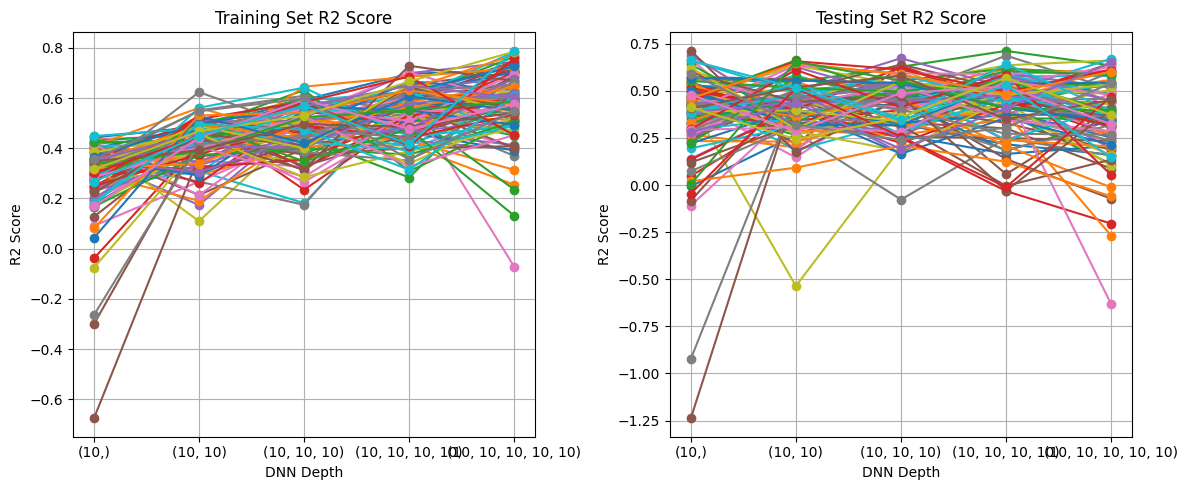

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
crad = datasets.fetch_atlas_craddock_2012() 
atlas_nii = index_img(crad['scorr_mean'], 0) # Lowest resolution
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True) 
input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] #  gives subject age on standard units after z-scoring 

# Split the data: First 90 for training, last 10 for testing
X_train, X_test = input_variables[:90], input_variables[90:] # Get first 90 subjects
y_train, y_test = output_variable[:90], output_variable[90:] # Get last 10 subjects

depths = [(10,), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)] # DNN depths
alpha_value = 0.0001 # Fixed alpha value
random_states = range(100) # Random states for model

train_r2_scores = {depth: [] for depth in depths} # Training set R2 scores
test_r2_scores = {depth: [] for depth in depths} # Testing set R2 scores

for depth in depths: # Iterate through depths
    for random_state in random_states: # Iterate through random states
        # Create the model with the given depth and fixed alpha
        model_q9 = MLPRegressor(hidden_layer_sizes=depth, activation='relu', alpha=alpha_value, random_state=random_state)
        model_q9.fit(X_train, y_train) # Fit the model

        train_r2_scores[depth].append(r2_score(y_train, model_q9.predict(X_train))) # Store train accuracy
        test_r2_scores[depth].append(r2_score(y_test, model_q9.predict(X_test))) # Store test accuracy

# Convert accuracies to arrays
train_array = np.array([train_r2_scores[depth] for depth in depths]).T
test_array = np.array([test_r2_scores[depth] for depth in depths]).T

fig, axs = plt.subplots(1, 2, figsize=(12, 5)) # Plot results
depth_labels = ['(10,)', '(10, 10)', '(10, 10, 10)', '(10, 10, 10, 10)', '(10, 10, 10, 10, 10)']
for i, data in enumerate([train_array, test_array]):
    for j in range(100):
        axs[i].plot(range(5), data[j], marker='o')
    axs[i].set_title('Training Set R2 Score' if i == 0 else 'Testing Set R2 Score')
    axs[i].set_xlabel('DNN Depth')
    axs[i].set_ylabel('R2 Score')
    axs[i].set_xticks(range(5))
    axs[i].set_xticklabels(depth_labels)
    axs[i].grid()
plt.tight_layout()
plt.show()

### **Question 10**

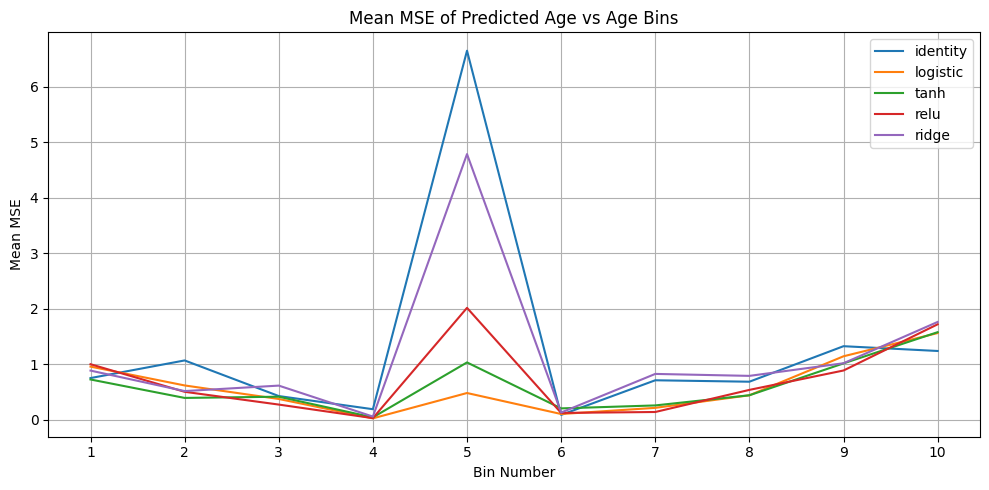

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
crad = datasets.fetch_atlas_craddock_2012() 
atlas_nii = index_img(crad['scorr_mean'], 0) # Lowest resolution
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True) 
input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] #  gives subject age on standard units after z-scoring 

min_age, max_age = output_variable.min(), output_variable.max() # Get min and max age
age_bins = np.linspace(min_age, max_age, 11) # Create 10 bins

activations = ['identity', 'logistic', 'tanh', 'relu', 'ridge'] # Activation functions
alpha_value = 0.0001 # Fixed alpha value
bin_mse={activation : {i: [] for i in range(10)} for activation in activations} # MSE for each bin
kf_q10 = KFold(n_splits=10, shuffle=True, random_state=42) # 10-fold cross-validation

for activation in activations: # Iterate through activations
    for train_index, test_index in kf_q10.split(input_variables): # Iterate through folds
        if activation == 'ridge': # If the current activation is ridge regression
            ridge_model_q10 = Ridge(alpha=alpha_value)
            ridge_model_q10.fit(input_variables[train_index], output_variable[train_index])
            y_prob = ridge_model_q10.predict(input_variables[test_index])
        else:
            # Create model
            model_q10 = MLPRegressor(hidden_layer_sizes=(10,), activation=activation, alpha=alpha_value)#, random_state=42)
            model_q10.fit(input_variables[train_index], output_variable[train_index]) # Fit model
            y_prob = model_q10.predict(input_variables[test_index])#[:,1] # Get probabilities
        
        for i in range(10): # Iterate through bins
            bin_mask = (output_variable[test_index] >= age_bins[i]) & (output_variable[test_index] < age_bins[i+1])
            if np.any(bin_mask): 
                bin_mse[activation][i].append(mean_squared_error(output_variable[test_index][bin_mask], y_prob[bin_mask])) # Store MSE

bin_mean_mse=np.zeros((5,10)) # Mean MSE for each bin
for activation in bin_mse: # Iterate through activations
    for i in range(10): # Iterate through bins
        bin_mean_mse[activations.index(activation),i]=np.mean(bin_mse[activation][i]) # Calculate mean MSE

plt.figure(figsize=(10,5)) # Plot results
for i in range(5):
  plt.plot(range(1,11), bin_mean_mse[i,:])
plt.legend(activations)
plt.xticks(range(1,11))
plt.xlabel("Bin Number")
plt.ylabel("Mean MSE")
plt.title("Mean MSE of Predicted Age vs Age Bins")
plt.grid()
plt.tight_layout()
plt.show()